# Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno # for null Values


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")


## Import dataset

In [2]:
data=pd.read_csv("/home/onyxia/work/PROJET_STATAPP/Data/Raws/fraud_oracle.csv", sep=";")
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

We have 15420 entries and 33 variables : 9 quantitatives and 24 categorical. 

Data explanation : 

- Month: The month in which the accident actually occurred. 

- WeekOfMonth: The week of the month in which the accident actually occurred.

- DayOfWeek: The day of the week on which the accident actually occurred.

- Make: The manufacturer of the vehicle involved in the claim.

- AccidentArea: The area where the accident occurred (urban/rural).

- DayOfWeekClaimed: The day of the week on which the insurance claim was processed.

- MonthClaimed: The month in which the insurance claim was processed.

- WeekOfMonthClaimed: The week of the month in which the insurance claim was processed.

- Sex: The gender of the policyholder.

- MaritalStatus: The material status of the policyholder.

- Age: The age of the policyholder.

- Fault: Indicates whether the policyholder was at fault in the accident.

- PolicyType: The type of insurance policy.

- VehicleCategory: The category of the vehicle (e.g., sedan, SUV).

- VehiclePrice: The price of vehicle.

- FraudFound_P: Indicates whether fraud was detected in the insurance claim (our target variable)

- PolicyNumber: The unique identifier for the insurance policy.

- RepNumber: The unique identifier for the insurance representative handling the claim.

- Deductible: The amount that the policy holder must pay out of pocket before the insurance company pays the remaining costs.

- DriverRating: The rating of the driver, often based on driving history or other factors.

- Days_Policy_Accident: The number of days since the policy was issued until the accident occurred.

- Days_Policy_Claim: The number of days since the policy was issued until the claim was made.

- PastNumberOfClaims: The number of claims previously made by the policyholder. 

- AgeOfVehicle: The age of the vehicle involved in the claim.

- AgeOfPolicyHolder: The age of the policyholder.

- PoliceReportFiled: Indicates whether a police report was filed for the accident.

- WitnessPresent: Indicates whether a witness was present at the scene of the accident.

- AgentType: The type of insurance agent handling the policy (e.g., internal, external)

- NumberOfSuppliments: The number of supplementary documents or claims related to the main claim, categorized into ranges.

- AddressChange_Claim: Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.

- NumberOfCars: The number of cars insured under the policy, categorized into ranges.

- Year: The year in which the claim was made or processed.

- BasePolicy: The base policy type (e.g., Liability, Collision, All Perils).

<Axes: >

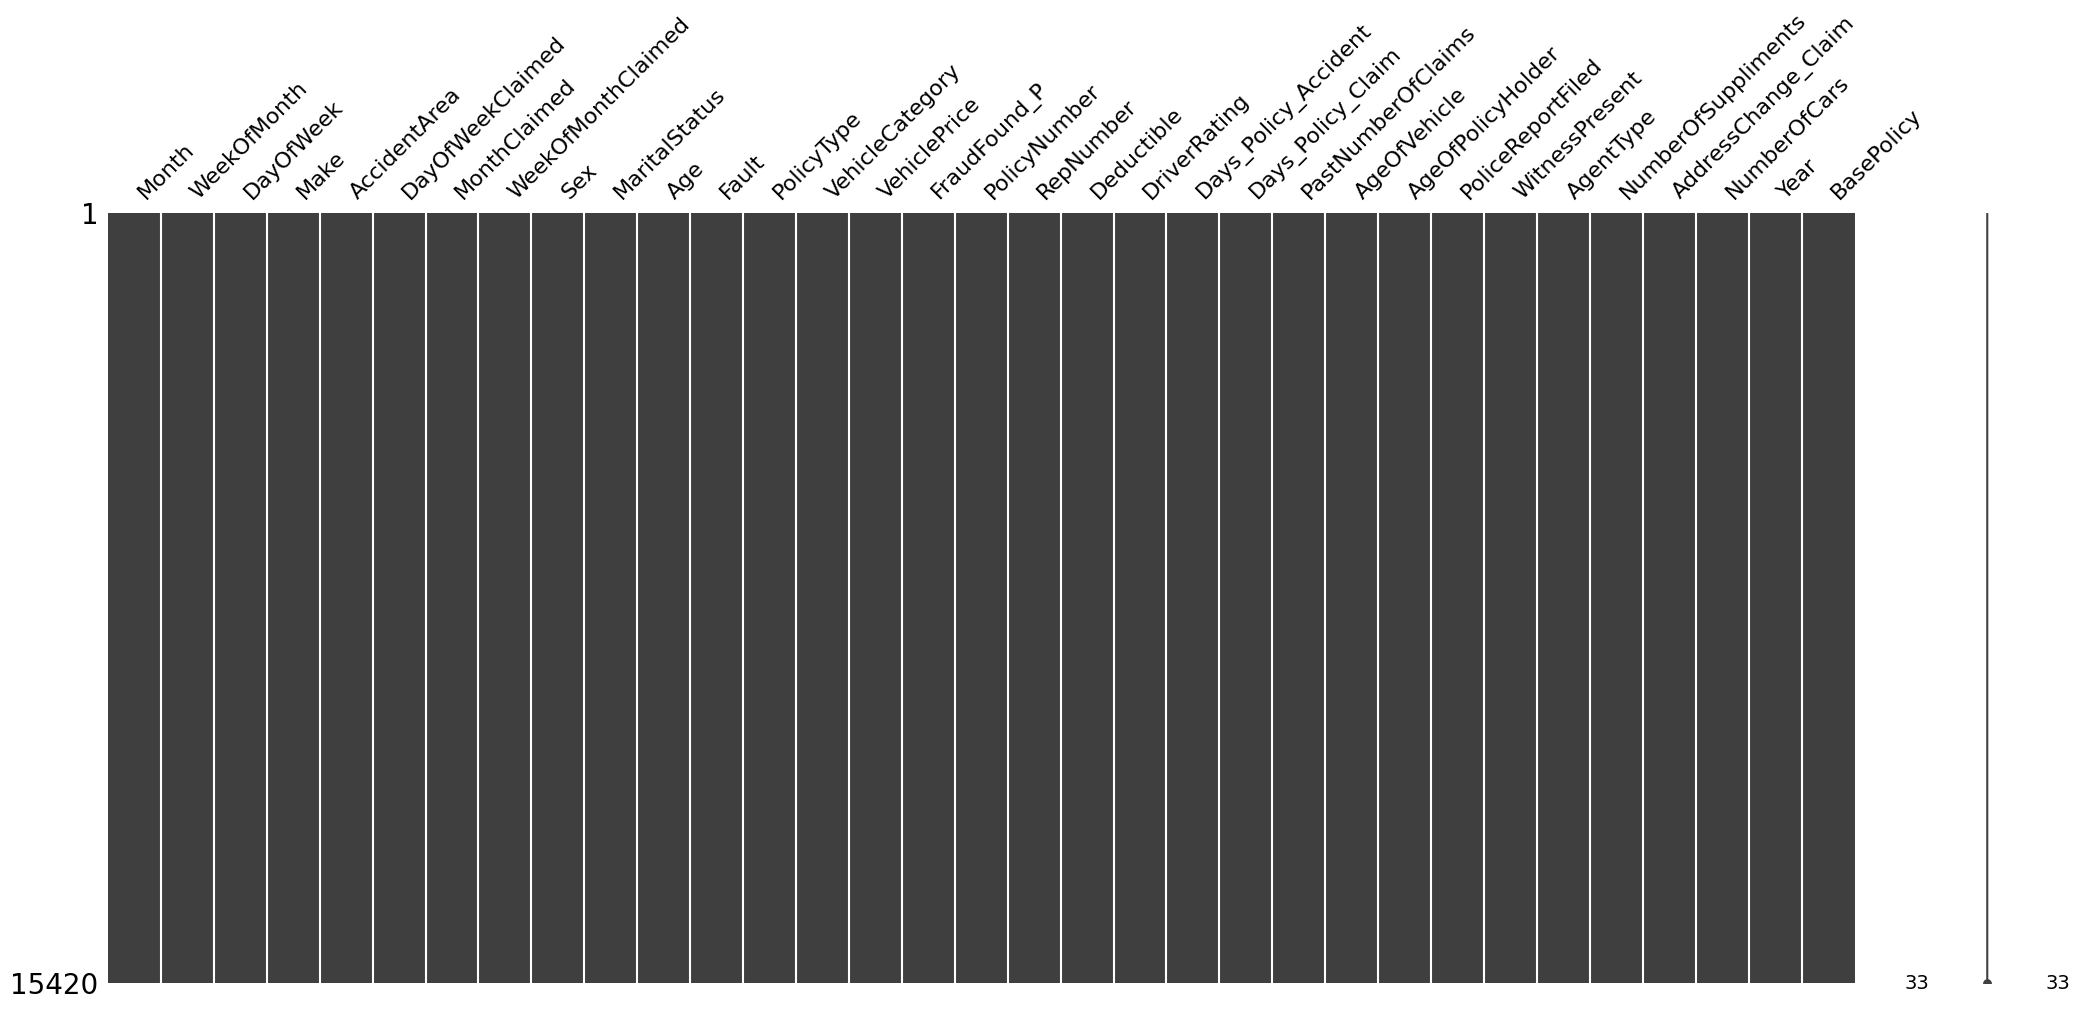

In [4]:
msno.matrix(data)

We don't have missing values.

In [5]:
#Checking for duplicate values
data.duplicated().sum()

np.int64(0)

No duplicated value

## Target variable

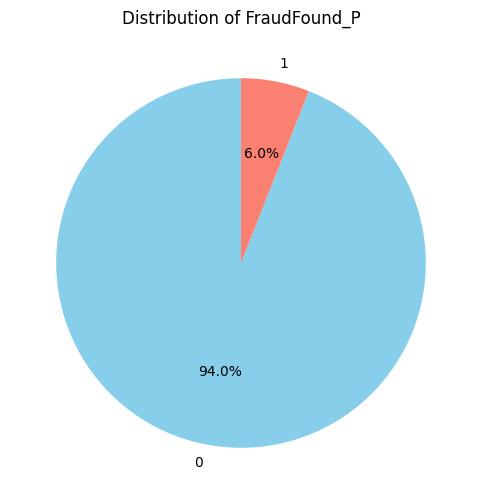

In [6]:
target_counts = data['FraudFound_P'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title('Distribution of FraudFound_P')
plt.show()

Our target Variable "Fraud_Found_P" is highly imbalanced. 
Oversampling address these issues by balancing the dataset, which helps the model to learn from both classes more effectively. This improves the model's ability to correctly predict the minority class, leading to better overall performance and more reliable evaluation metrics.

## Qualitative variables

In [7]:
cat = data.select_dtypes(include=['object', 'category'])
cat_cols = cat.columns 

# Loop through and display detailed info for each categorical variable
for col in cat_cols:
    print(f"\n==================== {col} ====================")
    print(f"Number of unique modalities: {data[col].nunique()}")
    print("\nPercentages :")
    print((data[col].value_counts(normalize=True, dropna=False) * 100).round(2))



==================== Month ====================
Number of unique modalities: 12

Percentages :
Month
Jan    9.15
May    8.87
Mar    8.82
Jun    8.57
Oct    8.46
Dec    8.33
Apr    8.30
Feb    8.21
Jul    8.15
Sep    8.04
Nov    7.79
Aug    7.31
Name: proportion, dtype: float64

==================== DayOfWeek ====================
Number of unique modalities: 7

Percentages :
DayOfWeek
Monday       16.96
Friday       15.86
Tuesday      14.92
Thursday     14.09
Wednesday    14.00
Saturday     12.85
Sunday       11.32
Name: proportion, dtype: float64

==================== Make ====================
Number of unique modalities: 19

Percentages :
Make
Pontiac      24.88
Toyota       20.24
Honda        18.16
Mazda        15.27
Chevrolet    10.90
Accura        3.06
Ford          2.92
VW            1.84
Dodge         0.71
Saab          0.70
Mercury       0.54
Saturn        0.38
Nisson        0.19
BMW           0.10
Jaguar        0.04
Porche        0.03
Mecedes       0.03
Ferrari       0.01
Lexu

- The features "Sex", "PoliceReportFiled", and "WitnessPresent" are actually Boolean Types. Should be converted to 0 or 1.
- The features "AccidentalArea", "Fault", and "AgentType" each have only two unique values. Can also be converted to 0 or 1.
- PolicyType - appears to be a concatenation of VehicleCategory and BasePolicy (so we'll drop those two)
- Anomalies : day_of_week_claimed (8 modalities), month_claimed (13 modalities) none on days_policy_Accident

In [8]:
data[data['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


We'll drop this line cause it has many anomalies (Age = 0, Monthclaimed = 0 but a WeekOfMonthClaimed that is not null, ...)

In [9]:
data = data[data['DayOfWeekClaimed'] != '0']

Now we look at lines where Days_Policy_Accident = None. 

In [10]:
none_days=data[data['Days_Policy_Accident'] == 'none']
none_days.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
204,Dec,3,Friday,Pontiac,Urban,Tuesday,Jan,3,Male,Married,...,7 years,36 to 40,No,No,External,none,2 to 3 years,1 vehicle,1994,All Perils
731,Mar,5,Thursday,Pontiac,Urban,Monday,May,3,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,All Perils
1073,Jun,5,Thursday,Honda,Urban,Friday,Jul,3,Male,Married,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
1210,Oct,3,Tuesday,Toyota,Urban,Thursday,Nov,1,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability
1308,Jul,3,Monday,Mazda,Urban,Tuesday,Sep,2,Female,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Liability


None can means that the accident occured the same day the policy was issued. So we'll leave it like that. 

### Relation with the target variable

In [11]:
import sys
!{sys.executable} -m pip install nbformat==4.3

In [12]:
for cat in cat_cols:
    # Proportions per category
    prop_df = pd.crosstab(data[cat], data['FraudFound_P'], normalize='index')
    prop_df = prop_df.reset_index()
    prop_df = prop_df.melt(id_vars=cat, value_vars=[0,1], var_name='FraudFound_P', value_name='Proportion')

    # Graph
    fig = px.bar(prop_df, x=cat,
        y='Proportion',
        color='FraudFound_P',
        text='Proportion',
        barmode='stack',
        color_discrete_map={0:'skyblue', 1:'salmon'},
        labels={'FraudFound_P':'Fraud', 'Proportion':'Proportion'},
        title=f'Proportion of Fraud vs Non-Fraud by {cat}'
    )

    fig.update_traces(texttemplate='%{text:.1%}', textposition='inside')
    fig.update_layout(yaxis_tickformat='.0%')
    fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

- Variables of dates(Month, WeekOfMonth, DayOfWeek, DayOfWeekClaimed, WeekOfMonthClaimed, MonthClaimed) seems not to influence the fraud too much
- The Mercedes owners are more likely to be involved in fraud,with almost double the incidence compared to the second-highest group, Accura owners. On the other hand, the Porche, Lexus, Jaguar, Ferrari owners have never been reported for fraud; all the four make are "High-End".
- The results suggest that males are significantly more likely to be involved in detected fraud cases compared to females. 
- Fraud is generally declared when the fault comes from the policy holder
- Fraudulent cases were detected most frequently under the "All Perils". Within specified policy types, "Sport-Collision" had the highest fraud detection rate.
- Fraud is most frequently detected among teenagers and retired seniors. Teenagers have weak financial power as they have not yet started their economic activities, and retired seniors experience weakened financial power post-retirement.
- Fraudster use to change their address 

In [ ]:
# Test of chi2 

from scipy.stats import chi2_contingency

for var in cat_cols:
    # Crée la table de contingence
    contingency_table = pd.crosstab(data[var], data['FraudFound_P'])
    
    # Applique le test du chi-deux
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {var}")
    print(f"Chi2 Statistic: {chi2:.2f}, p-value: {p:.4f}")
    print("-"*40)


Variable: Month
Chi2 Statistic: 29.77, p-value: 0.0017
----------------------------------------
Variable: DayOfWeek
Chi2 Statistic: 10.15, p-value: 0.1184
----------------------------------------
Variable: Make
Chi2 Statistic: 59.82, p-value: 0.0000
----------------------------------------
Variable: AccidentArea
Chi2 Statistic: 16.90, p-value: 0.0000
----------------------------------------
Variable: DayOfWeekClaimed
Chi2 Statistic: 5.10, p-value: 0.5316
----------------------------------------
Variable: MonthClaimed
Chi2 Statistic: 42.20, p-value: 0.0000
----------------------------------------
Variable: Sex
Chi2 Statistic: 13.50, p-value: 0.0002
----------------------------------------
Variable: MaritalStatus
Chi2 Statistic: 1.01, p-value: 0.7983
----------------------------------------
Variable: Fault
Chi2 Statistic: 264.98, p-value: 0.0000
----------------------------------------
Variable: PolicyType
Chi2 Statistic: 437.49, p-value: 0.0000
----------------------------------------
V

The khi-2 test shows us that NumberofCars, WitnessPresent, Days_Policy_claim, MaritalStatus, Dayofweekclaimed, dayofweek are not significative at 5%. 

## Quantitative variables

In [ ]:
quanti = data.select_dtypes(include=['int64', 'float64'])
quanti_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
quanti.describe()

NameError: name 'quanti' is not defined

The minimum value of "Age" is 0. It totally doesn't make sense.  
"PolicyNumber" and "RepNumber" are merely identification numbers. Let's drop them.

Strictly speaking, among all the features, only Age is a numeric variable. The rest can be interpreted as categorical variables.

### Age

In [ ]:
# Create a plot with 2 subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of Age", "Boxplot of Age"))

# Histogram
hist = px.histogram(data, x="Age", nbins=50)
fig.add_trace(hist.data[0], row=1, col=1)

# Boxplot
box = px.box(data, y="Age")
fig.add_trace(box.data[0], row=1, col=2)

fig.update_layout(
    showlegend=False,
    height=400,
    width=900
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

We have some outliers but they are plausible and their percentage is not very large. 
Actually, Age and AgeofPolicyHolder seems to be the same. Let's check it 

In [ ]:

# Bornes et labels
bins = [0, 17, 20, 25, 30, 35, 40, 50, 65, float('inf')]
labels = ['0-17','18-20','21-25', '26-30', '31-35', '36-40', '41-50', '51-65', '65+']

# Discrétisation de la variable Age
data['Age_Binned'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# 3Distribution (%) pour Age (discrétisé)
dist_age = (
    data['Age_Binned']
    .value_counts(normalize=True)
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'Category', 'Age_Binned': 'Proportion'})
)
dist_age.columns = ['Category', 'Proportion']

# Distribution (%) pour AgeOfPolicyHolder (déjà catégorielle)
dist_policy = (
    data['AgeOfPolicyHolder']
    .value_counts(normalize=True)
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'Category', 'AgeOfPolicyHolder': 'Proportion'})
)
dist_policy.columns = ['Category', 'Proportion']

# Création de sous-graphiques côte à côte
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribution of Age (Binned)", "Distribution of AgeOfPolicyHolder"),
    shared_yaxes=True
)

# Ajout du graphique pour Age
fig.add_trace(
    go.Bar(
        x=dist_age['Category'],
        y=dist_age['Proportion'],
        text=[f"{p:.1%}" for p in dist_age['Proportion']],
        textposition='auto',
        marker_color='skyblue',
        name='Age'
    ),
    row=1, col=1
)

# Ajout du graphique pour AgeOfPolicyHolder
fig.add_trace(
    go.Bar(
        x=dist_policy['Category'],
        y=dist_policy['Proportion'],
        text=[f"{p:.1%}" for p in dist_policy['Proportion']],
        textposition='auto',
        marker_color='salmon',
        name='AgeOfPolicyHolder'
    ),
    row=1, col=2
)

# Mise en forme
fig.update_layout(
    title_text="Side-by-Side Comparison: Age vs AgeOfPolicyHolder",
    showlegend=False,
    yaxis_tickformat='.0%',
    height=500,
    width=1000
)

fig.update_xaxes(title_text="Age Category", row=1, col=1)
fig.update_xaxes(title_text="Policy Holder Age Category", row=1, col=2)
fig.update_yaxes(title_text="Proportion", row=1, col=1)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [13]:
from scipy.stats import chi2_contingency

# S'assurer qu'il n'y a pas de valeurs manquantes
subset = data[['Age_Binned', 'AgeOfPolicyHolder']].dropna()

# Créer la table de contingence
contingency = pd.crosstab(subset['Age_Binned'], subset['AgeOfPolicyHolder'])

# Appliquer le test du Khi-deux
chi2, p, dof, expected = chi2_contingency(contingency)

# Afficher les résultats
print("Chi2 Statistic:", round(chi2, 2))
print("Degrees of Freedom:", dof)
print("p-value:", p)

# Optionnel : afficher la table de contingence
print("\nContingency Table:")
display(contingency)


KeyError: "['Age_Binned'] not in index"

There is a strong dependency between the variables. We''ll use AgeofPolicyHolder to impute Age

In [ ]:
# There are  320 records where the age is 0
print('There are ', len(data[data['Age']==0]), 'records where the age is 0')

# For all this rows policy holder age  is between 16 and 17 years old.
print('For all this rows policy holder age is: ', data.loc[(data['Age']==0),'AgeOfPolicyHolder'].unique())

There are  319 records where the age is 0
For all this rows policy holder age is:  ['16 to 17']


We  Will replace all 0 values with 16 or 17 randomly

In [14]:
random_ages = np.random.choice([16, 17], size=data['Age'].eq(0).sum())
data.loc[data['Age'] == 0, 'Age'] = random_ages

print('Now there are ', len(data[data['Age']==0]), 'records where the age is 0')

Now there are  0 records where the age is 0


### Variable delay

We create a quantitative variable that will compute the distance between the day of the accident and the day of claim 

In [15]:
months_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Mapping des mois en nombres
data['Month_num'] = data['Month'].map(months_map)
data['MonthClaimed_num'] = data['MonthClaimed'].map(months_map)

# Ajustement si MonthClaimed < Month (cas de passage à l’année suivante)
data.loc[data['MonthClaimed_num'] <= data['Month_num'], 'MonthClaimed_num'] += 12

# Calcul du délai approximatif en semaines
data['delay_weeks'] = (
    (data['MonthClaimed_num'] - data['Month_num']) * 5 +
    (data['WeekOfMonthClaimed'] - data['WeekOfMonth'])
)
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month_num,MonthClaimed_num,delay_weeks
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,No,External,none,1 year,3 to 4,1994,Liability,12,13,1
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,No,External,none,no change,1 vehicle,1994,Collision,1,13,61
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,No,External,none,no change,1 vehicle,1994,Collision,10,11,2
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,No,External,more than 5,no change,1 vehicle,1994,Liability,6,7,4
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,External,none,no change,1 vehicle,1994,Collision,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,No,External,none,no change,1 vehicle,1996,Collision,11,23,61
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,No,External,more than 5,no change,3 to 4,1996,Liability,11,12,1
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,No,External,1 to 2,no change,1 vehicle,1996,Collision,11,12,1
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,No,External,more than 5,no change,1 vehicle,1996,All Perils,12,24,61


In [16]:
# Variables quantitatives à analyser
vars_quanti = ["delay_weeks", "Age"]

for col in vars_quanti:
    # --- Boxplot ---
    fig_box = px.box(data,
        x="FraudFound_P",          
        y=col,                   
        color="FraudFound_P",      
        title=f"Boxplot de {col} selon la fraude"
    )
    fig_box.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Suppression des variables inutiles

In [17]:
cols_to_drop = [
    'Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 
    'MonthClaimed', 'WeekOfMonthClaimed', 'PolicyNumber', 
    'RepNumber', 'Days_Policy_Claim', 'AgeOfPolicyHolder', 
    'BasePolicy', 'Year', "VehicleCategory", 'Month_num', 'MonthClaimed_num'
]

data = data.drop(columns=cols_to_drop)

In [18]:
print(data.columns)

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Age', 'Fault',
       'PolicyType', 'VehiclePrice', 'FraudFound_P', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'delay_weeks'],
      dtype='object')


In [19]:
df = data

In [20]:
import os 
folder_path = "/home/onyxia/PROJET_STATAPP/Data/Cleans"
file_path = os.path.join(folder_path, "data_vehicle_cleaned.csv")
df.to_csv(file_path, index=False)

OSError: Cannot save file into a non-existent directory: '/home/onyxia/PROJET_STATAPP/Data/Cleans'

In [ ]:
df=pd.read_csv("/home/onyxia/PROJET_STATAPP/Data/Cleans/data_vehicle_cleaned.csv", sep=",")

FileNotFoundError: [Errno 2] No such file or directory: '/home/onyxia/PROJET_STATAPP/Data/Cleans/data_vehicle_cleaned.csv'

# Pipeline de feature engineering

## Feature engineering

Jusqu'ici, nous avons créé la variable delay_weeks, supprimé les variables qui ont nécessité sa création et d'autres variables non pertinentes. Nous avons par ailleurs, imputé les données manquantes sur Age. 

Nous procédons ici présent à l'encodage dans variables qualitatives, le scaling de Age et delay_weeks. 

Puis nous verrons le feature importance de chaque variable.

In [21]:
# Modalités des variables
exclude_cols = ['Age', 'delay_weeks', 'FraudFound_P']
for col in df.columns:
    if col not in exclude_cols:
        print(f"\n--- {col} ---")
        print(data[col].unique())  # affiche toutes les modalités



--- Make ---
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

--- AccidentArea ---
['Urban' 'Rural']

--- Sex ---
['Female' 'Male']

--- MaritalStatus ---
['Single' 'Married' 'Widow' 'Divorced']

--- Fault ---
['Policy Holder' 'Third Party']

--- PolicyType ---
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

--- VehiclePrice ---
['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']

--- Deductible ---
[300 400 500 700]

--- DriverRating ---
[1 4 3 2]

--- Days_Policy_Accident ---
['more than 30' '15 to 30' 'none' '1 to 7' '8 to 15']

--- PastNumberOfClaims ---
['none' '1' '2 to 4' 'more than 4']

--- AgeOfVehicle ---
['3 years' '6 years' '7 years' 'more than 7' '5 years' '

In [22]:
#Train-test-split
X = df.drop(columns=['FraudFound_P'])
y = df['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Sauvegarde des donnees

In [23]:
df.to_csv("/home/onyxia/work/PROJET_STATAPP/Data/Cleans/Data_for_active_learning.csv")

### Pipeline

In [24]:
# -----------------------------
# Colonnes par type
# -----------------------------
label_cols = ['Make', 'MaritalStatus']
freq_cols = ['PolicyType']
ordinal_cols = ['VehiclePrice', 'Days_Policy_Accident', 'PastNumberOfClaims', 
                'AgeOfVehicle', 'NumberOfSuppliments', 'AddressChange_Claim', 
                'NumberOfCars', 'DriverRating', 'Deductible']
binary_cols = ['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType']
scale_cols = ['Age', 'delay_weeks']

# -----------------------------
# Binary encoder
# -----------------------------
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.binary_map = {
            'No':0, 'Yes':1, 'Female':0, 'Male':1, 'Urban':1, 'Rural':0, 
            'Policy Holder':1, 'Third Party':0, 'External':0, 'Internal':1
        }
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_trans = X.copy()
        for col in X_trans.columns:
            X_trans[col] = X_trans[col].map(self.binary_map)
        return X_trans

# -----------------------------
# Label encoding multiple colonnes
# -----------------------------

class MultiLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.le_dict = {}
        self.classes_ = {}

    def fit(self, X, y=None):
        for col in X.columns:
            le = LabelEncoder()
            values = X[col].astype(str).tolist()

            # Ajouter une classe spéciale "unknown"
            unique_vals = list(set(values))
            unique_vals.append("__unknown__")

            le.fit(unique_vals)
            self.le_dict[col] = le
            self.classes_[col] = set(unique_vals)

        return self

    def transform(self, X):
        X_trans = X.copy()

        for col in X.columns:
            le = self.le_dict[col]

            # Remplacer les valeurs inconnues
            X_trans[col] = X_trans[col].astype(str).apply(
                lambda v: v if v in self.classes_[col] else "__unknown__"
            )

            X_trans[col] = le.transform(X_trans[col])

        return X_trans


# -----------------------------
# Frequency encoding
# -----------------------------
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, default_value=0):
        self.freq_map = {}
        self.default_value = default_value
        
    def fit(self, X, y=None):
        for col in X.columns:
            freq = X[col].value_counts() / len(X)
            self.freq_map[col] = freq.to_dict()
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        for col in X.columns:
            # map avec valeur par défaut si modalité inconnue
            X_encoded[col] = X_encoded[col].map(self.freq_map[col]).fillna(self.default_value)
        return X_encoded

# -----------------------------
# Ordinal mapping automatique
# -----------------------------
class OrdinalMapper(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_dict):
        self.mapping_dict = mapping_dict
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_trans = X.copy()
        for col, map_dict in self.mapping_dict.items():
            X_trans[col] = X_trans[col].map(map_dict)
        return X_trans

# Mapping des colonnes ordinales
ordinal_mapping = {
    'VehiclePrice': {'less than 20000':0, '20000 to 29000':1, '30000 to 39000':2,
                     '40000 to 59000':3, '60000 to 69000':4, 'more than 69000':5},
    'Days_Policy_Accident': {'none':0, '1 to 7':1, '8 to 15':2, '15 to 30':3, 'more than 30':4},
    'PastNumberOfClaims': {'none':0, '1':1, '2 to 4':2, 'more than 4':3},
    'AgeOfVehicle': {'new':0, '2 years':1, '3 years':2, '4 years':3, '5 years':4, '6 years':5, '7 years':6, 'more than 7':7},
    'NumberOfSuppliments': {'none':0, '1 to 2':1, '3 to 5':2, 'more than 5':3},
    'AddressChange_Claim': {'no change':0,'under 6 months':1, '1 year':2, '2 to 3 years':3, '4 to 8 years':4},
    'NumberOfCars': {'1 vehicle':0, '2 vehicles':1, '3 to 4':2, '5 to 8':3, 'more than 8':4},
    'DriverRating': {1:1, 2:2, 3:3, 4:4},  # déjà numérique
    'Deductible': {300:300, 400:400, 500:500, 700:700}  # déjà numérique
}

ordinal_pipe = Pipeline([
    ('ordinal_map', OrdinalMapper(ordinal_mapping))
])

# -----------------------------
# Pipeline complet
# -----------------------------
preprocessor = ColumnTransformer([
    ('binary', BinaryEncoder(), binary_cols),
    ('label', MultiLabelEncoder(), label_cols),
    ('freq', FrequencyEncoder(), freq_cols),
    ('ordinal', ordinal_pipe, ordinal_cols),
    ('scale', StandardScaler(), scale_cols)
])

# -----------------------------
# Appliquer sur train/test
# -----------------------------

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convertir en DataFrame avec noms de colonnes
all_cols = binary_cols + label_cols + freq_cols + ordinal_cols + scale_cols
X_train_processed = pd.DataFrame(X_train_processed, columns=all_cols)

print("Train shape:", X_train_processed.shape)


Train shape: (12335, 20)


### Sauvegarde du pipeline

In [25]:
from joblib import dump, load

dump(preprocessor, "preprocessor.joblib")

['preprocessor.joblib']

In [26]:
X_train_processed.head()

,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,Make,MaritalStatus,PolicyType,VehiclePrice,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,DriverRating,Deductible,Age,delay_weeks
0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0,0.264694,1.0,4.0,1.0,4.0,0.0,0.0,0.0,1.0,400.0,-0.887773,-1.829302
1,1.0,1.0,1.0,0.0,0.0,0.0,16.0,1.0,0.264694,1.0,4.0,2.0,6.0,3.0,0.0,0.0,3.0,400.0,0.223423,-1.212111
2,1.0,1.0,1.0,0.0,0.0,0.0,8.0,1.0,0.320308,1.0,4.0,0.0,5.0,2.0,0.0,0.0,3.0,400.0,-0.729031,0.557172
3,1.0,1.0,0.0,0.0,0.0,0.0,12.0,1.0,0.320308,1.0,4.0,2.0,6.0,3.0,0.0,0.0,1.0,400.0,-0.014690,-1.705864
4,1.0,1.0,1.0,0.0,0.0,0.0,14.0,2.0,0.320308,2.0,4.0,3.0,6.0,3.0,3.0,1.0,2.0,500.0,-0.252804,0.598318


In [27]:
X_test_processed = pd.DataFrame(X_test_processed, columns=all_cols)
X_test_processed.head()

,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,Make,MaritalStatus,PolicyType,VehiclePrice,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,DriverRating,Deductible,Age,delay_weeks
0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,0.364491,3.0,4.0,2.0,6.0,0.0,0.0,0.0,4.0,400.0,-0.649660,-1.870448
1,1.0,1.0,0.0,0.0,0.0,0.0,12.0,2.0,0.264694,1.0,4.0,2.0,4.0,0.0,0.0,0.0,3.0,400.0,-1.522743,0.557172
2,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.320308,1.0,4.0,1.0,6.0,0.0,0.0,0.0,2.0,400.0,-0.411546,0.639464
3,1.0,1.0,0.0,0.0,0.0,0.0,12.0,1.0,0.264694,2.0,4.0,0.0,7.0,3.0,0.0,0.0,2.0,400.0,0.937764,0.598318
4,1.0,1.0,1.0,0.0,0.0,0.0,6.0,1.0,0.364491,1.0,4.0,1.0,6.0,0.0,0.0,0.0,4.0,700.0,0.779022,0.598318


In [28]:
missing = pd.DataFrame(X_test_processed).isna().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [29]:
set_config(display='diagram')
preprocessor

,transformers,"[('binary', ...), ('label', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,default_value,0
,mapping_dict,"{'AddressChange_Claim': {'1 year': 2, '2 to 3 years': 3, '4 to 8 years': 4, 'no change': 0, ...}, 'AgeOfVehicle': {'2 years': 1, '3 years': 2, '4 years': 3, '5 years': 4, ...}, 'Days_Policy_Accident': {'1 to 7': 1, '15 to 30': 3, '8 to 15': 2, 'more than 30': 4, ...}, 'Deductible': {300: 300, 400: 400, 500: 500, 700: 700}, ...}"
,copy,True


# MODELISATION

## Feature importance

## SMOTE

The Synthetic Minority Over-sampling Technique (SMOTE) is a method used in machine learning to address the issue of imbalanced datasets. Imbalanced datasets are common in classification problems, especially Fraud Detection datasets, where one class (often the minority class) has significantly fewer instances than the other class(es). SMOTE aims to balance the class distribution by generating synthetic examples from the minority class.

In [30]:
!{sys.executable} -m pip install --upgrade imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Avant SMOTE :", Counter(y_train))

sm = SMOTE(sampling_strategy=0.25,  # 20% fraude,
     random_state=42, 
     k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train_processed, y_train)

print("Après SMOTE :", Counter(y_train_res))

Avant SMOTE : Counter({0: 11597, 1: 738})
Après SMOTE : Counter({0: 11597, 1: 2899})


## Modèles

### Modélisation au meilleur seuil (indice de Youden)

In [32]:
from sklearn.metrics import (
    roc_curve, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler

# ---------------------------------------
# Fonction pour Youden
# ---------------------------------------
def optimal_threshold_youden(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    youden = tpr - fpr
    idx = np.argmax(youden)
    return thresholds[idx], tpr[idx], 1 - fpr[idx]


# ---------------------------------------
# Définition des modèles
# ---------------------------------------
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        solver="lbfgs"
    ),
    
    "LightGBM": LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=50,
        objective="binary",
        class_weight="balanced",
        random_state=42
    )
}

In [33]:
results = []

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # 1. Entraînement
    model.fit(X_train_res, y_train_res)
    
    # 2. Probabilités
    y_proba = model.predict_proba(X_test_processed)[:, 1]
    
    # 3. Seuil optimal (Youden)
    best_threshold, sens, spec = optimal_threshold_youden(y_test, y_proba)
    
    # 4. Nouvelle prédiction selon ce seuil
    y_pred_opt = (y_proba >= best_threshold).astype(int)
    
    # 5. Calcul des métriques
    acc = accuracy_score(y_test, y_pred_opt)
    prec = precision_score(y_test, y_pred_opt)
    rec = recall_score(y_test, y_pred_opt)
    f1 = f1_score(y_test, y_pred_opt)
    auc = roc_auc_score(y_test, y_proba)
    
    results.append({
        "Model": name,
        "Best Threshold (Youden)": best_threshold,
        "Sensitivity": sens,
        "Specificity": spec,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "AUC": auc
    })


# --------------------------
# Tableau final
# --------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

print("\n=== Résultats des modèles (au seuil optimal) ===")
results_df



--- Training LogisticRegression ---

--- Training LightGBM ---
[LightGBM] [Info] Number of positive: 2899, number of negative: 11597
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3138
[LightGBM] [Info] Number of data points in the train set: 14496, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

=== Résultats des modèles (au seuil optimal) ===


,Model,Best Threshold (Youden),Sensitivity,Specificity,Accuracy,Precision,Recall,F1-score,AUC
0,LightGBM,0.029658,0.881081,0.616419,0.632296,0.127843,0.881081,0.223288,0.799853
1,LogisticRegression,0.526235,0.702703,0.622284,0.627108,0.106122,0.702703,0.184397,0.712486


## Optimisation des hyperparamètres

### LightGBM

| Hyperparamètre      | Description                                                                                          |
| ------------------- | ---------------------------------------------------------------------------------------------------- |
| `num_leaves`        | Nombre maximum de feuilles par arbre (contrôle la complexité, équivalent à la profondeur effective). |
| `max_depth`         | Profondeur maximale des arbres (permet de limiter la complexité, -1 = illimité).                     |
| `learning_rate`     | Taux d’apprentissage, plus petit = modèle plus robuste mais nécessite plus d’arbres.                 |
| `n_estimators`      | Nombre total d’arbres (boosting rounds).                                                             |
| `min_data_in_leaf`  | Nombre minimum d’observations dans une feuille (augmente la régularisation).                         |
| `feature_fraction`  | Fractions de variables à utiliser pour chaque arbre (équivalent au “colsample”).                     |
| `bagging_fraction`  | Fraction d’observations utilisées pour chaque arbre (sous-échantillonnage).                          |
| `bagging_freq`      | Fréquence du bagging (0 = désactivé, >0 = ex : 5 = appliquer toutes les 5 itérations).               |
| `lambda_l1`         | Régularisation L1 (LASSO) sur les feuilles.                                                          |
| `lambda_l2`         | Régularisation L2 (Ridge) sur les feuilles.                                                          |
| `min_gain_to_split` | Gain minimal pour créer une nouvelle division (pruning).                                             |
| `class_weight`      | Gestion du déséquilibre : ex. `{0:1, 1:5}` ou `"balanced"`.                                          |
| `subsample_for_bin` | Taille de l’échantillon utilisé pour créer les histogrammes de binning.                              |
| `max_bin`           | Nombre maximal de bins pour les features continues (granularité des splits).                         |


In [51]:
from sklearn.model_selection import GridSearchCV

# -----------------------------
# Définition du modèle de base
# -----------------------------
lgbm = LGBMClassifier(
    objective='binary',
    random_state=42,
    class_weight='balanced'
)

# -----------------------------
# Grille d'hyperparamètres
# -----------------------------
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 8, 10],               
    'learning_rate': [0.01, 0.05, 0.1],   
}

# -----------------------------
# GridSearchCV
# -----------------------------
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# -----------------------------
# Entraînement
# -----------------------------
grid_search.fit(X_train_res, y_train_res)

# -----------------------------
# Meilleurs paramètres
# -----------------------------
print("Meilleurs paramètres LightGBM :", grid_search.best_params_)
print("Meilleure AUC CV :", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[LightGBM] [Info] Number of positive: 1933, number of negative: 7731
[LightGBM] [Info] Number of positive: 1933, number of negative: 7731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2547
[LightGBM] [Info] Number of data points in the train set: 9664, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2547
[LightGBM] [Info] Number of data points in the train set: 9664, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] N

In [52]:
# Récupération du meilleur modèle LightGBM
best_lgbm = grid_search.best_estimator_

# Probabilités pour le test
y_proba = best_lgbm.predict_proba(X_test_processed)[:, 1]

# ---- Calcul du seuil optimal (Youden) ----
from sklearn.metrics import roc_curve

def optimal_threshold_youden(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    youden = tpr - fpr
    idx = np.argmax(youden)
    return thresholds[idx], tpr[idx], 1 - fpr[idx]

best_threshold, sens, spec = optimal_threshold_youden(y_test, y_proba)

# Prédictions avec le seuil optimal
y_pred_opt = (y_proba >= best_threshold).astype(int)

# ---- Métriques finales ----
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc = accuracy_score(y_test, y_pred_opt)
prec = precision_score(y_test, y_pred_opt)
rec = recall_score(y_test, y_pred_opt)
f1 = f1_score(y_test, y_pred_opt)
auc = roc_auc_score(y_test, y_proba)

print("\n=== Résultats LightGBM optimisé ===")
print(f"Best Threshold (Youden): {best_threshold:.3f}")
print(f"Sensitivity: {sens:.3f}, Specificity: {spec:.3f}")
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}")



=== Résultats LightGBM optimisé ===
Best Threshold (Youden): 0.100
Sensitivity: 0.908, Specificity: 0.617
Accuracy: 0.635, Precision: 0.132, Recall: 0.908, F1: 0.230, AUC: 0.814


#### Just for the note de mi parcours

[LightGBM] [Info] Number of positive: 738, number of negative: 11597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 12335, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059830 -> initscore=-2.754558
[LightGBM] [Info] Start training from score -2.754558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

=== Résultats LightGBM optimisé ===
Best Threshold (Youden): 0.038
Sensitivity: 0.886, Specificity: 0.646
Accuracy: 0.661, Precision: 0.138, Recall: 0.886, F1: 0.239, AUC: 0.810


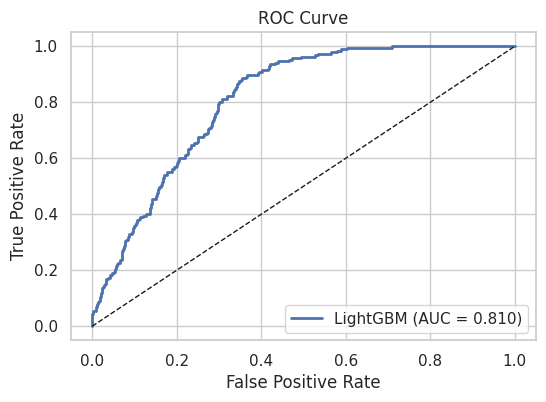

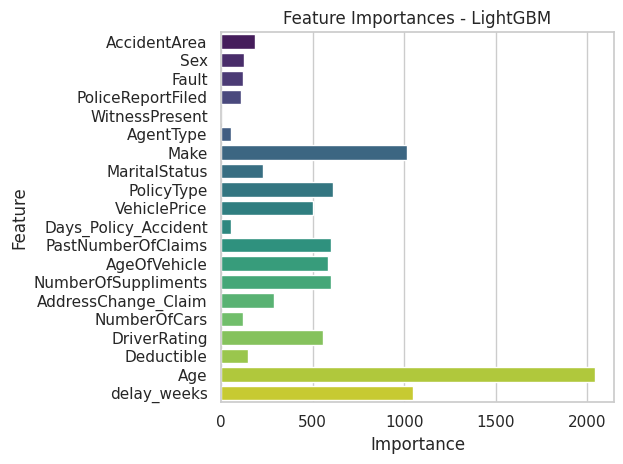

In [35]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# --------------------------------------
# Définition du modèle LightGBM
# --------------------------------------
lgbm_model = lgb.LGBMClassifier(
    learning_rate=0.05,
    max_depth=10,
    n_estimators=300,
    random_state=42
)

# Entraînement sur les données pré-traitées
lgbm_model.fit(X_train_processed, y_train)

# --------------------------------------
# Probabilités pour le test
# --------------------------------------
y_proba = lgbm_model.predict_proba(X_test_processed)[:, 1]

# ---- Calcul du seuil optimal (Youden) ----
def optimal_threshold_youden(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    youden = tpr - fpr
    idx = np.argmax(youden)
    return thresholds[idx], tpr[idx], 1 - fpr[idx]

best_threshold, sens, spec = optimal_threshold_youden(y_test, y_proba)

# Prédictions avec le seuil optimal
y_pred_opt = (y_proba >= best_threshold).astype(int)

# ---- Métriques finales ----
acc = accuracy_score(y_test, y_pred_opt)
prec = precision_score(y_test, y_pred_opt)
rec = recall_score(y_test, y_pred_opt)
f1 = f1_score(y_test, y_pred_opt)
auc = roc_auc_score(y_test, y_proba)

print("\n=== Résultats LightGBM optimisé ===")
print(f"Best Threshold (Youden): {best_threshold:.3f}")
print(f"Sensitivity: {sens:.3f}, Specificity: {spec:.3f}")
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, AUC: {auc:.3f}")

# --------------------------------------
# Courbe ROC
# --------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {auc:.3f})', linewidth=2)
plt.plot([0,1], [0,1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# --------------------------------------
# Feature importances
# --------------------------------------
importances = lgbm_model.feature_importances_
feature_names = X_train_processed.columns

feat_imp = sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importances - LightGBM")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Sauvegarde du modele

In [44]:
model = LGBMClassifier(
    learning_rate=0.05,
    max_depth=10,
    n_estimators=300
)
dump(model, "lgbm_untrained.joblib")

['lgbm_untrained.joblib']